In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox
from scipy.stats import zscore
import math

# Import Data

In [3]:
train = pd.read_csv("/Users/irenewalken/Documents/GitHub/Airline-Passenger-Satisfaction-Machine_learning-/Data/train.csv")
test = pd.read_csv("/Users/irenewalken/Documents/GitHub/Airline-Passenger-Satisfaction-Machine_learning-/Data/test.csv")
data = pd.concat([train, test])
data

# Data cleaning

**Drop unused columns**

In [3]:
data = data.drop(["Unnamed: 0"], axis = 1)
data = data.drop(["id"], axis = 1)
data = data.drop(["Arrival Delay in Minutes"], axis = 1)
data.to_csv('/Users/irenewalken/Documents/GitHub/Airline-Passenger-Satisfaction-Machine_learning-/Airline-Passenger-Satisfaction-Machine_learning.csv')
data

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0,neutral or dissatisfied
25972,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,4,4,4,4,4,5,5,5,5,4,0,satisfied
25973,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0,neutral or dissatisfied
25974,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,4,4,4,4,3,2,5,4,5,4,0,satisfied


**Check the data types**

In [4]:
data.dtypes

Gender                               object
Customer Type                        object
Age                                   int64
Type of Travel                       object
Class                                object
Flight Distance                       int64
Inflight wifi service                 int64
Departure/Arrival time convenient     int64
Ease of Online booking                int64
Gate location                         int64
Food and drink                        int64
Online boarding                       int64
Seat comfort                          int64
Inflight entertainment                int64
On-board service                      int64
Leg room service                      int64
Baggage handling                      int64
Checkin service                       int64
Inflight service                      int64
Cleanliness                           int64
Departure Delay in Minutes            int64
satisfaction                         object
dtype: object

**Check if we have NaN values**

In [5]:
data.isnull().sum().sum()

0

In [6]:
data.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
satisfaction                         0
dtype: int64

In [7]:
data.shape

(129880, 22)

**Drop rows with Nan value**


As Nan value is less than 1% of data

In [8]:
data = data.dropna()

In [9]:
data.shape

(129880, 22)

# EDA 

In [10]:
data_numerical = data.select_dtypes(include=np.number, exclude=np.object)#get numerical data



**Make a heat map for seeing the correlation between columns**

We can see that Arrival Delay in Minutes and Departure Delay in Minutes have very strong correlation, so we need to drop one of them

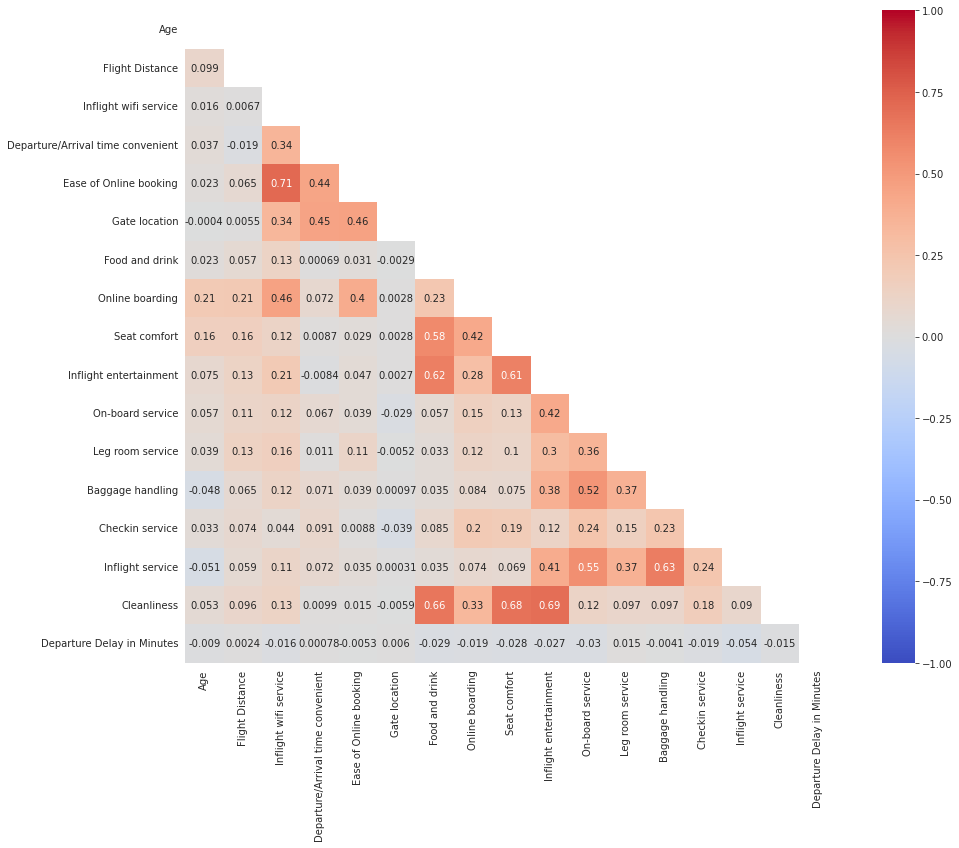

In [11]:
corr = data_numerical.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(16, 12))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

In [12]:
data = data.drop(["Arrival Delay in Minutes"],axis = 1)
data

KeyError: "['Arrival Delay in Minutes'] not found in axis"

In [ ]:
data.describe()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
 
fig = plt.figure(figsize =(10, 7))

plt.boxplot(data["Flight Distance"])

plt.show()

In [ ]:
Q1 = np.percentile(data["Flight Distance"], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(data["Flight Distance"], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

# Upper bound
upper = np.where(data["Flight Distance"] >= (Q3+1.5*IQR))
print(upper)

# Lower bound
lower = np.where(data["Flight Distance"] <= (Q1-1.5*IQR))
print(lower)

In [ ]:
data = data[data["Flight Distance"]< Q3+1.5*IQR]   # delete Upper bound outliers (we don't have lower bound, so we will delete just upper bound)
data

In [ ]:
data.describe()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
 
fig = plt.figure(figsize =(10, 7))

plt.boxplot(data["Departure Delay in Minutes"])

plt.show()

In [ ]:
Q1 = np.percentile(data["Departure Delay in Minutes"], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(data["Departure Delay in Minutes"], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

# Upper bound
upper = np.where(data["Departure Delay in Minutes"] >= (Q3+1.5*IQR))
print(upper)

# Lower bound
lower = np.where(data["Departure Delay in Minutes"] <= (Q1-1.5*IQR))
print(lower)


In [ ]:
data = data[data["Departure Delay in Minutes"]< Q3+1.5*IQR]   # delete Upper bound outliers (we don't have lower bound, so we will delete just upper bound)
data

In [ ]:
data.describe()

In [ ]:
data_categorical = data.select_dtypes(include=np.object, exclude=np.number)#get categorical data
data_numerical = data.select_dtypes(include=np.number, exclude=np.object)
data_categorical

# Encoding categorical data

In [ ]:
data_categorical["Class"].unique()

In [ ]:
data_categorical["Class"] = data_categorical["Class"].replace(["Business", "Eco Plus", "Eco"], [3,2,1])
data_categorical["satisfaction"] = data_categorical["satisfaction"].replace(["neutral or dissatisfied", "satisfied"], [0,1])

In [ ]:
data_categorical["Class"].unique()

In [ ]:
data_categorical

In [ ]:
data_categorical["Class"].value_counts()

In [ ]:
X = data_categorical.drop(["Class", "satisfaction"],axis =1)
X

In [ ]:
X_features=pd.get_dummies(X, drop_first=True).astype(np.int64) # One hot
X_features

In [ ]:
total = pd.concat([data_numerical, X_features], axis=1)
total

In [ ]:
total["Class"] = data_categorical["Class"]
total["satisfaction"] = data_categorical["satisfaction"]
total

In [ ]:
total.shape

In [ ]:
target = total["satisfaction"]
target

# Change imbalance data to balance

In [ ]:
satisfaction_0 = total[total["satisfaction"] == 0]
satisfaction_1 = total[total["satisfaction"] == 1]

In [ ]:
total["satisfaction"].value_counts()

## Downsampling

In [ ]:
print(satisfaction_0.shape)
print(satisfaction_1.shape)

In [ ]:
satisfaction_0_down = satisfaction_0.sample(len(satisfaction_1))
print(satisfaction_0_down.shape)
print(satisfaction_1.shape)

In [ ]:
data = pd.concat([satisfaction_0_down,satisfaction_1 ], axis = 0)
#shuffling the data
data = data.sample(frac=1)
data["satisfaction"].value_counts()

In [ ]:
data

### Decision Tree Classifier

In [ ]:
X = data.drop(["satisfaction"], axis = 1)
y = data["satisfaction"]

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=24)

model = DecisionTreeClassifier(max_depth=13)

model.fit(X_train, y_train)

y_pred_train_dt = model.predict(X_train)
y_pred_test_dt = model.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

fig, ax = plt.subplots(1,2, figsize=(14,8))


plot_confusion_matrix(model,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")


plot_confusion_matrix(model,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

#### Features Importances

In [ ]:
plt.figure(figsize=(20,14))
plt.barh(X.columns,model.feature_importances_)

In [ ]:
feature_importance = model.feature_importances_ 
sorted_idx = np.argsort(feature_importance) # Sort index on feature importance
fig = plt.figure(figsize=(20, 15)) # Set plot size (denoted in inches)
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])

plt.xlabel("Feature importance") # Add x axis
plt.ylabel("Feature")

#### Features Importances (2 variant)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))

#### Features Importances (3 variant)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

### Random forest Classifier

In [ ]:
X = data.drop(["satisfaction"], axis = 1)
y = data["satisfaction"]

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)

X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

model4 = RandomForestClassifier(max_depth=26,min_samples_leaf=20,max_features=None,n_estimators=100,
                             bootstrap=True,oob_score=True, random_state=0)
model4.fit(X_train, y_train)
print("Accuracy of train: ",model4.score(X_train, y_train))
print("Accuracy of test: ",model4.score(X_test, y_test))

model4 = RandomForestClassifier(max_depth=26,min_samples_leaf=20,max_features=None,n_estimators=100,
                         bootstrap=True,oob_score=True, random_state=0)
cross_val_scores = cross_val_score(model4, X_train, y_train, cv=5)
print(cross_val_scores)


### Logistic Regression

In [ ]:
X = data.drop(["satisfaction"], axis = 1)
y = data["satisfaction"]

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.20,random_state=123)

model2 = LogisticRegression() 

trans = PowerTransformer()

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

model2.fit(X_train_mod, y_train)

y_pred_train_log = model2.predict(X_train_mod)
y_pred_test_log = model2.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

fig, ax = plt.subplots(1,2, figsize=(14,8))


plot_confusion_matrix(model2,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")


plot_confusion_matrix(model2,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

#### Features Importances

In [ ]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model2.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

### Knn Classifier

In [ ]:
X = data.drop(["satisfaction"], axis = 1)
y = data["satisfaction"]

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.20,random_state=123)

#### Scale the data

In [ ]:
std_scaler=StandardScaler().fit(X_train)   ##. finding the parameters ( mean, variance from the training set )

X_train_scaled=std_scaler.transform(X_train)

In [ ]:
X_train.shape

In [ ]:
X_test_scaled=std_scaler.transform(X_test)

In [ ]:
print(X_train_scaled)
print("--------")
print(X_test_scaled)

In [ ]:
   
model3 = KNeighborsClassifier()
model3.fit(X_train_scaled, y_train)


y_pred_train = model3.predict(X_train_scaled)
y_pred_test = model3.predict(X_test_scaled)

performance = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred_test),
                                        precision_score(y_test, y_pred_test),
                                        recall_score(y_test, y_pred_test)]})

display(performance)


fig, ax = plt.subplots(1,2, figsize=(14,8))


plot_confusion_matrix(model3,X_train_scaled,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

plot_confusion_matrix(model3,X_test_scaled,y_test,ax=ax[1], values_format = 'd')
ax[1].title.set_text("Test Set")

### Models Comparision

In [ ]:
model_pipeline = [model,model4, model2, model3]
model_names = ['Decision Tree Classifier', 'Random forest Classifier','Logistic Regression', 'KNN Classifier']
scores = {}
i=0
for model in model_pipeline:
    mean_score = np.mean(cross_val_score(model, X_test, y_test, cv=5)) #,scoring="recall")
    scores[model_names[i]] = mean_score
    i = i+1
print(scores)

## Upsampling (SMOTE)

In [ ]:
smote = SMOTE()

In [ ]:
data = total
X = data.drop(["satisfaction"], axis = 1)
y = data["satisfaction"]

In [ ]:
y.value_counts()

In [ ]:
X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

### Decision Tree Classifier

In [ ]:
y = y_sm
X = X_sm

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

model= DecisionTreeClassifier(max_depth=14)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred_test),
                                        precision_score(y_test, y_pred_test),
                                        recall_score(y_test, y_pred_test)]})

display(performance_df)

fig, ax = plt.subplots(1,2, figsize=(14,8))


plot_confusion_matrix(model,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")


plot_confusion_matrix(model,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

### Random forest Classifier

In [ ]:
y = y_sm
X = X_sm


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)

X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

model4 = RandomForestClassifier(max_depth=30,min_samples_leaf=20,max_features=None,n_estimators=250,
                             bootstrap=True,oob_score=True, random_state=0)
model4.fit(X_train, y_train)
print("Accuracy of train: ",model4.score(X_train, y_train))
print("Accuracy of test: ",model4.score(X_test, y_test))

model4 = RandomForestClassifier(max_depth=30,min_samples_leaf=20,max_features=None,n_estimators=250,
                         bootstrap=True,oob_score=True, random_state=0)
cross_val_scores = cross_val_score(model4, X_train, y_train, cv=5)
print(cross_val_scores)



### Logistic Regression

In [ ]:
y = y_sm
X = X_sm

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.20,random_state=123)

model2 = LogisticRegression() 

trans = PowerTransformer()

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

model2.fit(X_train_mod, y_train)

y_pred_train_log = model2.predict(X_train_mod)
y_pred_test_log = model2.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

fig, ax = plt.subplots(1,2, figsize=(14,8))


plot_confusion_matrix(model2,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")


plot_confusion_matrix(model2,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")


### Knn Classifier

In [ ]:
y = y_sm
X = X_sm

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.20,random_state=123)

#### Scale the data

In [ ]:
std_scaler=StandardScaler().fit(X_train)  

X_train_scaled=std_scaler.transform(X_train)

In [ ]:
X_train.shape

In [ ]:
X_test_scaled=std_scaler.transform(X_test)

In [ ]:
print(X_train_scaled)
print("--------")
print(X_test_scaled)

In [ ]:
model3 = KNeighborsClassifier()
model3.fit(X_train_scaled, y_train)


y_pred_train = model3.predict(X_train_scaled)
y_pred_test = model3.predict(X_test_scaled)

performance = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred_test),
                                        precision_score(y_test, y_pred_test),
                                        recall_score(y_test, y_pred_test)]})

display(performance)


fig, ax = plt.subplots(1,2, figsize=(14,8))


plot_confusion_matrix(model3,X_train_scaled,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

plot_confusion_matrix(model3,X_test_scaled,y_test,ax=ax[1], values_format = 'd')
ax[1].title.set_text("Test Set")

### Models Comparision

In [ ]:
model_pipeline = [model,model4, model2, model3]
model_names = ['Decision Tree Classifier', 'Random forest Classifier','Logistic Regression', 'KNN Classifier']
scores = {}
i=0
for model in model_pipeline:
    mean_score = np.mean(cross_val_score(model, X_train, y_train, cv=5))
    scores[model_names[i]] = mean_score
    i = i+1
print(scores)